In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)


c:\Users\Kian\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

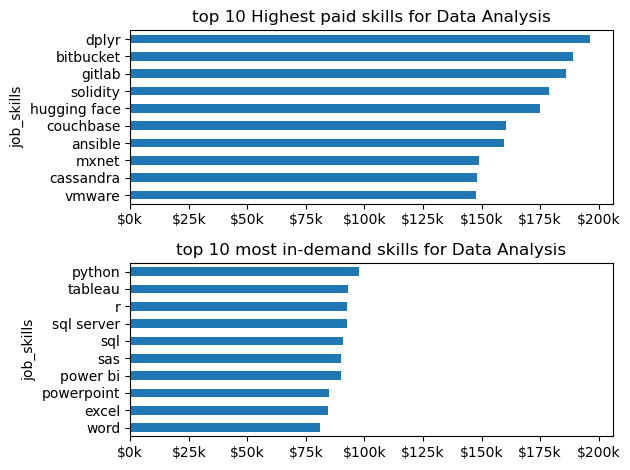

In [4]:
df_DA_US = df_DA_US.explode('job_skills')
df_groupby = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_toppay = df_groupby.sort_values(by='median', ascending=False).head(10)
df_topcount = df_groupby.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
fig, ax = plt.subplots(2, 1)
df_toppay.plot(kind = 'barh', y = 'median', ax = ax[0], legend= False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[0].set_title("top 10 Highest paid skills for Data Analysis")
df_topcount.plot(kind = 'barh', y = 'median', ax = ax[1],legend= False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].set_title("top 10 most in-demand skills for Data Analysis")

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()


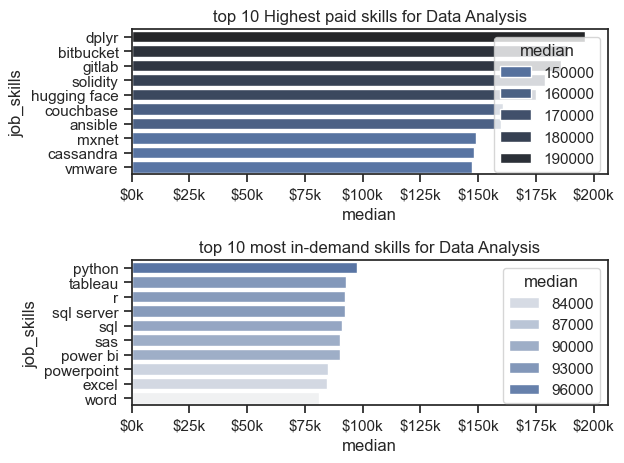

In [15]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style = 'ticks')
sns.barplot(data= df_toppay, x = 'median', y = df_toppay.index, ax = ax[0], hue= 'median', palette = 'dark:b_r')
sns.barplot(data= df_topcount, x = 'median', y = df_topcount.index, ax = ax[1], hue= 'median', palette = 'light:b')
#df_toppay.plot(kind = 'barh', y = 'median', ax = ax[0], legend= False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[0].set_title("top 10 Highest paid skills for Data Analysis")
#df_topcount.plot(kind = 'barh', y = 'median', ax = ax[1],legend= False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].set_title("top 10 most in-demand skills for Data Analysis")

#ax[0].invert_yaxis()
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()


Text(12.444444444444445, 0.5, 'Number Of Jobs')

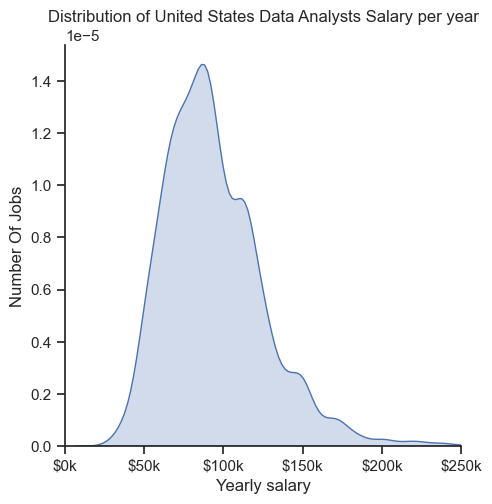

In [18]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
sns.set_theme(style = 'ticks')
sns.displot(df_DA_US['salary_year_avg'], kind= 'kde', fill = True)
#df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 50, edgecolor = 'black')
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.title("Distribution of United States Data Analysts Salary per year")
plt.xlabel("Yearly salary")
plt.ylabel("Number Of Jobs")

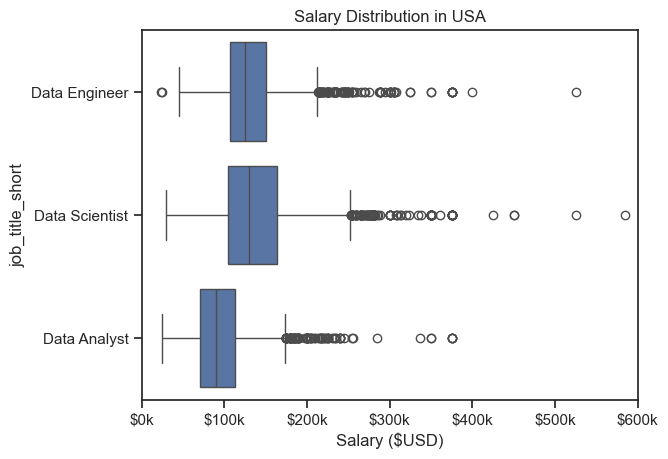

In [20]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset='salary_year_avg')
sns.boxplot(data = df_US, x = 'salary_year_avg', y = 'job_title_short')
plt.title("Salary Distribution in USA")
plt.xlabel("Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()